# Ecommerce customers 

# Importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset

#Reading the dataset and assigning it to a dataframe

In [2]:
df = pd.read_csv("Ecommerce.csv")

In [3]:
df #If index needs to be removed use index_col=0

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641
...,...,...,...,...,...,...
618,619,31.941434,11.158640,36.846959,3.219605,559.546775
619,620,33.446133,12.374820,37.592235,4.917733,515.186966
620,621,32.967749,11.392061,36.916664,2.955718,601.715746
621,622,33.469949,11.930872,37.744155,4.577850,477.741395


# EDA

In [5]:
df.shape #Determining the rows and columns of the dataframe

(623, 6)

In [6]:
df.dtypes #determining the data types of the columns and checking the datatype 

Customer ID               int64
Avg Session length      float64
Time on App             float64
Time on Website         float64
Length of MemberShip    float64
Yealy amount spent      float64
dtype: object

In [7]:
df.isna().sum() #Detrming the null values in the dataframe

Customer ID             0
Avg Session length      0
Time on App             0
Time on Website         0
Length of MemberShip    0
Yealy amount spent      0
dtype: int64

We have no null values in the dataframe

In [8]:
df.duplicated().sum() #Checking the duplicated rows if any

0

In [9]:
df.columns #Getting the columns

Index(['Customer ID', 'Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip', 'Yealy amount spent'],
      dtype='object')

<AxesSubplot:>

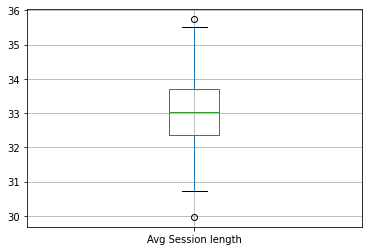

In [10]:
df.boxplot(column=["Avg Session length"]) #Boxplot to check outliers in the "Avg Session length" column

We have one outlier on the upper and the lower quartile 

<AxesSubplot:>

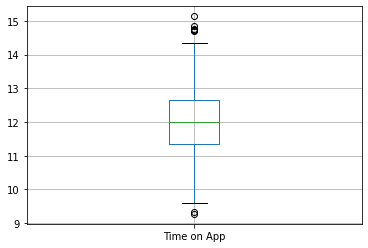

In [11]:
df.boxplot(column=["Time on App"])#Boxplot to check outliers in the "Time on App" column

We have few outliers in the upper and lower quartile range 

<AxesSubplot:>

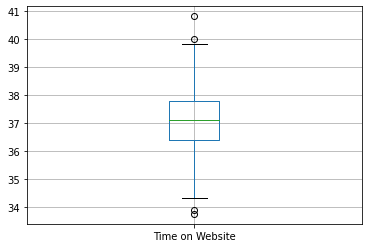

In [12]:
df.boxplot(column=["Time on Website"])#Boxplot to check outliers in the "Time on Website" column

<AxesSubplot:>

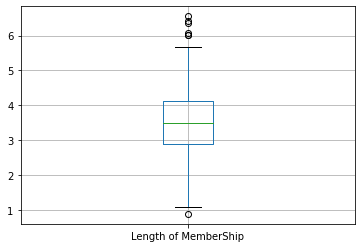

In [13]:
df.boxplot(column=["Length of MemberShip"]) ##Boxplot to check outliers in the "Length of MemberShip" column

We have few outliers in the "Length of membership " column

# Histogram to check the distribution of data

<AxesSubplot:>

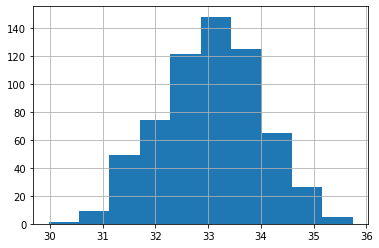

In [14]:
#Histogram
df["Avg Session length"].hist()

<AxesSubplot:>

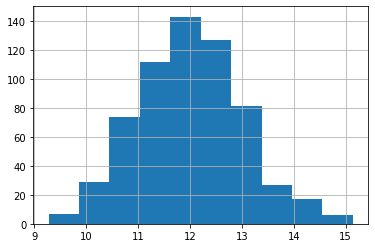

In [15]:
#Histogram
df["Time on App"].hist()

<AxesSubplot:>

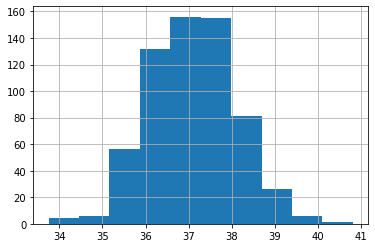

In [16]:
#Histogram
df["Time on Website"].hist()

<AxesSubplot:>

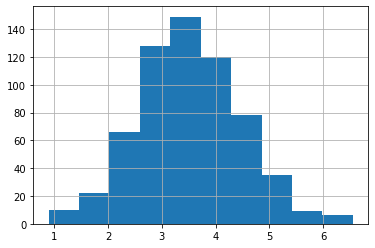

In [17]:
df["Length of MemberShip"].hist()

Interpretation:The independent features 'Avg Session length', 'Time on App', 'Time on Website','Length of MemberShip' 
follow normal distribition  

Lets plot a distplot to understand the distribution of data

<AxesSubplot:xlabel='Avg Session length', ylabel='Density'>

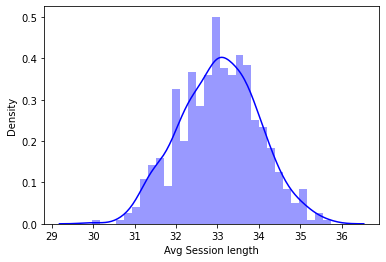

In [18]:
sns.distplot(df['Avg Session length'], color ='blue', bins = 30)

<AxesSubplot:xlabel='Time on App', ylabel='Density'>

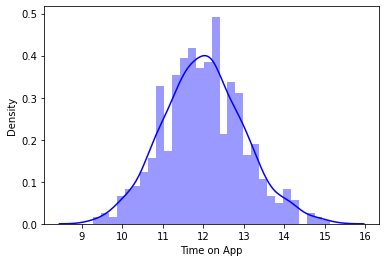

In [19]:
sns.distplot(df['Time on App'], color ='blue', bins = 30)

Using for loop to iterate through the independent features for code optimisation

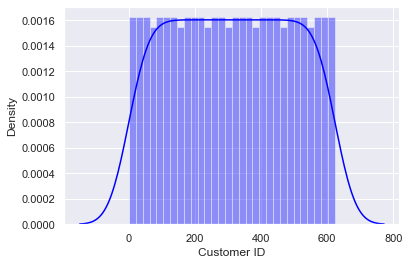

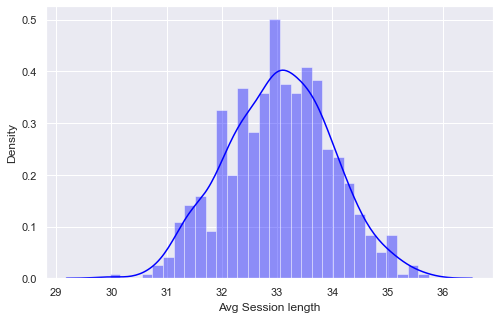

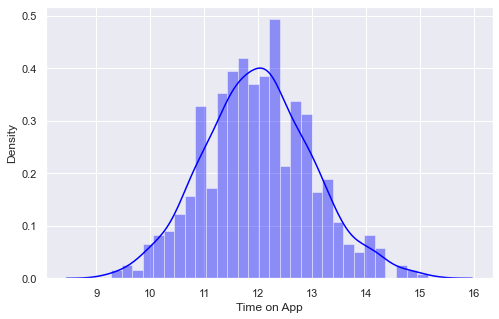

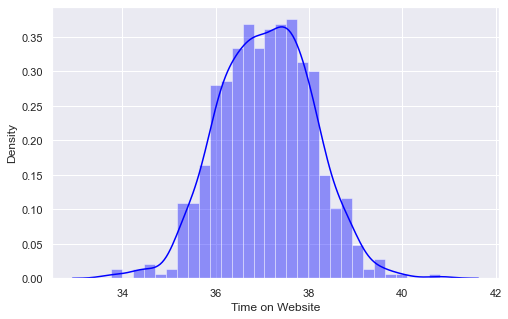

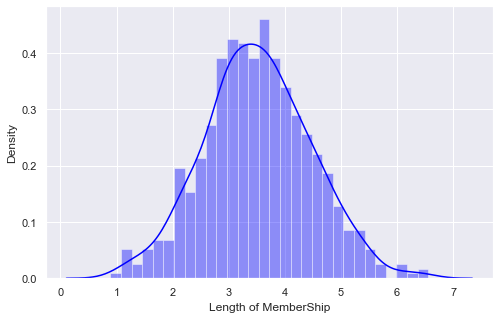

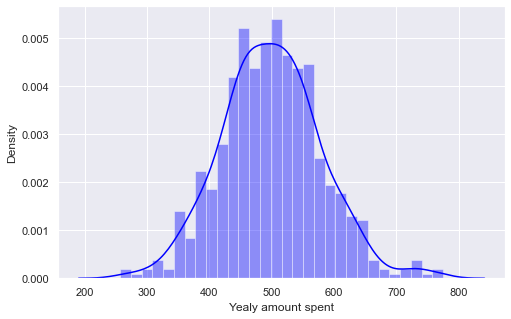

In [20]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    sns.distplot(df[i], color ='blue', bins = 30)
    

In [21]:
df.columns

Index(['Customer ID', 'Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip', 'Yealy amount spent'],
      dtype='object')

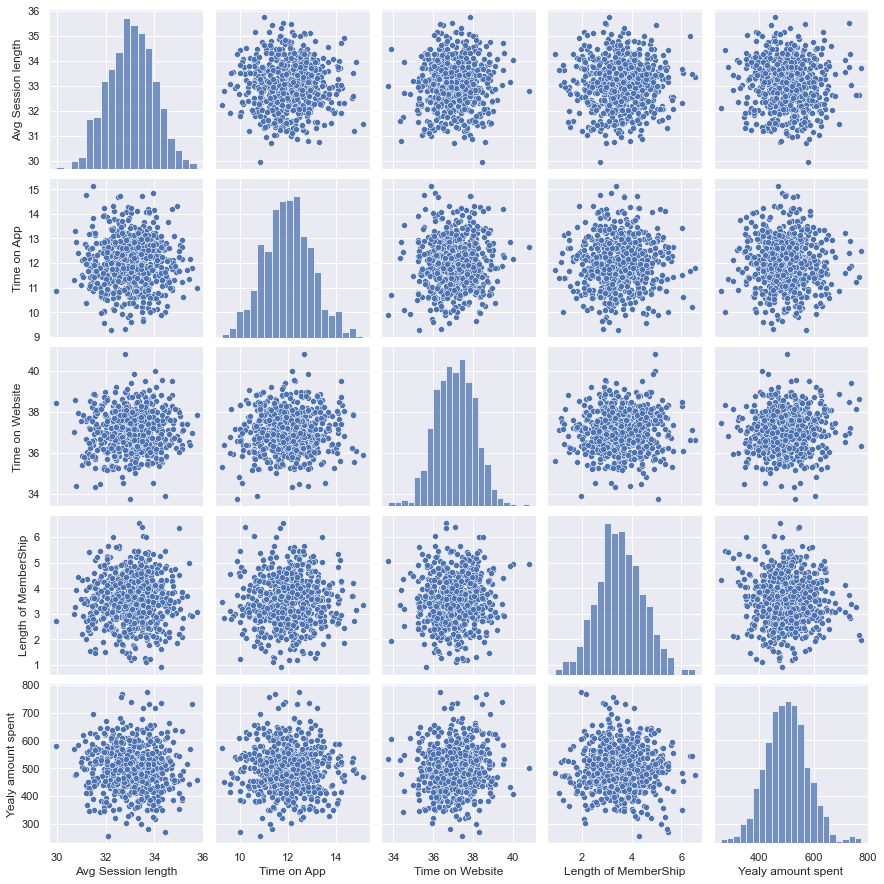

In [22]:
sns.pairplot(df,vars=['Avg Session length', 'Time on App', 'Time on Website','Length of MemberShip','Yealy amount spent'],)
plt.show()

In [23]:
df[['Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip', 'Yealy amount spent']].corr()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
Avg Session length,1.000000,-0.001234,0.050231,-0.010919,-0.042764
Time on App,-0.001234,1.000000,0.040029,0.029839,-0.012348
Time on Website,0.050231,0.040029,1.000000,0.036788,0.084305
Length of MemberShip,-0.010919,0.029839,0.036788,1.000000,-0.030451
Yealy amount spent,-0.042764,-0.012348,0.084305,-0.030451,1.000000


<AxesSubplot:>

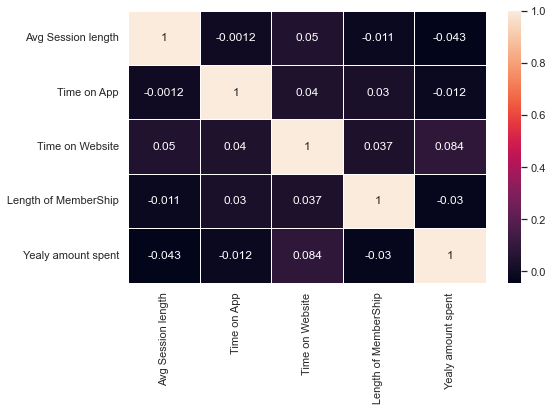

In [24]:
sns.heatmap(df[['Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip', 'Yealy amount spent']].corr(),linewidths=0.5,annot=True)

Heat Map interpretation

From the above heat map we can see that the corelation coefficient is very low as all the values lies in tha draker shade category
As it is evident from the pair plot we can see that there is no correlation between features.Some features like('Time on App and 'Average session lenth') have negative
corelation.
since some the features like() have no corelation and  some have negative coorelation we will consider all the features for model building
                                                                                                                

#Splitting the columns into independent and target features for model building

In [25]:
x = df[['Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip']]

In [26]:
x #x contains all the independent features

,Avg Session length,Time on App,Time on Website,Length of MemberShip
0,32.538350,12.028846,35.850540,3.648854
1,34.206718,12.226851,37.246443,1.987536
2,31.535240,11.814341,36.610697,3.351191
3,32.199577,11.295163,37.425695,5.234337
4,33.570137,13.500972,36.856165,3.938603
...,...,...,...,...
618,31.941434,11.158640,36.846959,3.219605
619,33.446133,12.374820,37.592235,4.917733
620,32.967749,11.392061,36.916664,2.955718
621,33.469949,11.930872,37.744155,4.577850


In [27]:
y = df[['Yealy amount spent']]

In [28]:
y

,Yealy amount spent
0,576.098273
1,460.784955
2,349.739791
3,547.709921
4,487.055641
...,...
618,559.546775
619,515.186966
620,601.715746
621,477.741395


Before doing feature selection lets consider all the features and build a model to understand the performance by 
using the evalutaion metrics such as mse,mape and accuracy score

# Summary of the EDA
1.We have plotted box plots to identify the outliers in the dataset.We have few outliers and we will not remove them as it might 
have an impact on the data.

2.We have plotted the histgram and distplot to understand the distrbution of data.The data is normally distrbuted and is not skewed
hence we would not be removing the outlierd in the data


3.We have also plotted the pair plot to understand the correlation.There is no correlation between the independent features and hence we cannot remove the any feature.All the featues playa crucial role in model building

4.We have plotted heatmap to undestand the correaltion between independent features.As it is evident from the pairplot may features have no / negative corelation.


Importing Linear Regression modules

In [29]:
from sklearn.linear_model import LinearRegression #Importing the necessary libararies to build the regression model


In [30]:
lm = LinearRegression()

In [31]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing set

In [32]:
xtrain,xtest,ytrain ,ytest = train_test_split(x,y,test_size=  0.2,random_state=1)

# Training the model on the training set

In [33]:
lm.fit(xtrain,ytrain)
lm.score(xtest,ytest)

-0.02518232674318921

# Predict the test set results

In [34]:
ypred = lm.predict(xtest)

In [35]:
ypred

array([[488.3762374 ],
       [488.76359004],
       [510.92525406],
       [509.5448299 ],
       [500.59168207],
       [499.19630031],
       [506.35356795],
       [487.26527218],
       [507.74523433],
       [507.68374239],
       [492.96472503],
       [506.48123862],
       [494.44924096],
       [495.01359276],
       [514.08070112],
       [500.70457222],
       [489.68861744],
       [501.73391792],
       [498.59663387],
       [498.24817362],
       [490.43872705],
       [499.46113672],
       [502.9107072 ],
       [502.39685049],
       [508.08242977],
       [507.01463257],
       [496.84824864],
       [483.76322229],
       [498.33183355],
       [506.06398029],
       [486.52801131],
       [496.6055741 ],
       [490.57510024],
       [493.34013173],
       [491.36857724],
       [521.50249426],
       [504.70576597],
       [492.32955269],
       [504.65849099],
       [506.96756127],
       [485.07248787],
       [515.53910052],
       [492.46045359],
       [505

Testing the model for the frist observation in the dataset.
First observation has these 

Features:

Avg Session length- 32.538350

Time on App- 12.028846

Time on Website	-35.850540

Length of MemberShip-3.648854

Target:

Yealy amount spent	576.098273



In [36]:
lm.predict([[32.538350,12.028846,35.850540,3.648854]])

array([[492.32954974]])

The regression mdel has predicted the "Yearly amount spent " as 492.32954974 as against 576.098273

In [37]:
ytest= np.array(ytest)
ytest

array([[631.4223353],
       [462.9961909],
       [500.8339579],
       [521.4200707],
       [601.7157458],
       [663.7338558],
       [418.5323291],
       [528.4431062],
       [585.84916  ],
       [445.1026663],
       [524.1315404],
       [579.2000648],
       [395.0524107],
       [413.9073401],
       [446.4917214],
       [438.3564101],
       [410.2656759],
       [513.9343242],
       [502.7579898],
       [546.1652755],
       [474.5841703],
       [553.4239669],
       [385.8763396],
       [523.0854531],
       [544.7425174],
       [382.0253352],
       [564.1235581],
       [497.8097448],
       [443.5283615],
       [443.6791171],
       [474.8221773],
       [387.6561747],
       [596.3220425],
       [474.0655209],
       [489.6617115],
       [381.1783688],
       [495.1238077],
       [576.0982734],
       [667.1046731],
       [432.3089249],
       [508.8394068],
       [613.7721856],
       [489.2312895],
       [411.3629306],
       [532.970231 ],
       [45

In [38]:
combined_array = np.column_stack((ytest,ypred,ytest-ypred))
combined_array

array([[ 6.31422335e+02,  4.88376237e+02,  1.43046098e+02],
       [ 4.62996191e+02,  4.88763590e+02, -2.57673991e+01],
       [ 5.00833958e+02,  5.10925254e+02, -1.00912962e+01],
       [ 5.21420071e+02,  5.09544830e+02,  1.18752408e+01],
       [ 6.01715746e+02,  5.00591682e+02,  1.01124064e+02],
       [ 6.63733856e+02,  4.99196300e+02,  1.64537555e+02],
       [ 4.18532329e+02,  5.06353568e+02, -8.78212389e+01],
       [ 5.28443106e+02,  4.87265272e+02,  4.11778340e+01],
       [ 5.85849160e+02,  5.07745234e+02,  7.81039257e+01],
       [ 4.45102666e+02,  5.07683742e+02, -6.25810761e+01],
       [ 5.24131540e+02,  4.92964725e+02,  3.11668154e+01],
       [ 5.79200065e+02,  5.06481239e+02,  7.27188262e+01],
       [ 3.95052411e+02,  4.94449241e+02, -9.93968303e+01],
       [ 4.13907340e+02,  4.95013593e+02, -8.11062527e+01],
       [ 4.46491721e+02,  5.14080701e+02, -6.75889797e+01],
       [ 4.38356410e+02,  5.00704572e+02, -6.23481621e+01],
       [ 4.10265676e+02,  4.89688617e+02

In [39]:
df1 = pd.DataFrame(combined_array,columns=['Ytest','Ypred','Difference'])
df1

,Ytest,Ypred,Difference
0,631.422335,488.376237,143.046098
1,462.996191,488.763590,-25.767399
2,500.833958,510.925254,-10.091296
3,521.420071,509.544830,11.875241
4,601.715746,500.591682,101.124064
...,...,...,...
120,489.011860,488.692408,0.319451
121,515.264434,504.021138,11.243296
122,496.016264,485.923060,10.093205
123,531.911300,492.761401,39.149900


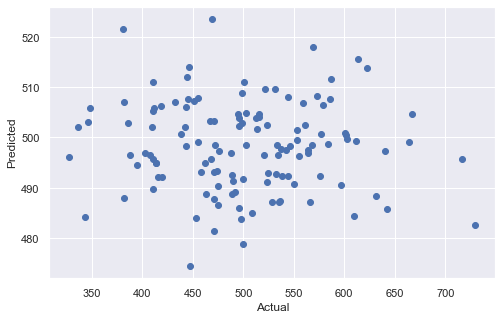

In [40]:
#Scatter plot for test and predicted value
plt.scatter(ytest,ypred)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<AxesSubplot:>

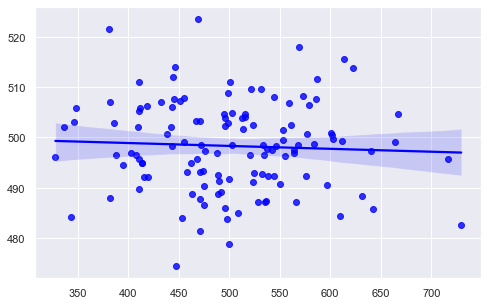

In [41]:
sns.regplot(x = ytest,y = ypred,color='blue')

In [42]:
New_Input = [[34.3,11.1,38.2,6]]

In [43]:
new_output = lm.predict(New_Input)
new_output

array([[495.1398048]])

# Evaluate the model

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(ytest,ypred)

-0.02518232674318921

The r2_score is negative suggesting the model is bad.We will have to improve the r2 score to build a good  model

In [46]:
from sklearn.metrics import mean_squared_error as MSE,r2_score,mean_absolute_error as mae,mean_absolute_percentage_error as mape
mse = MSE(ytest,ypred)
rmse = np.sqrt(mse)
ac = r2_score(ytest,ypred)
MAE = mae(ytest,ypred)
MAPE = mape(ytest,ypred)
print(f"MSE : {mse}\n RMSE : {rmse}\n Accuracy : {ac}\n MAE: {MAE}\n MAPE : {MAPE} ")


MSE : 6334.426011750221
 RMSE : 79.58910736872365
 Accuracy : -0.02518232674318921
 MAE: 62.95094005718036
 MAPE : 0.13026764778977012 


Evaluation metrics interpretation

MSE - This value is high as it predicts 6841.03 times more than the actual value

RMSE - The value of RMSe is also high

Accuracy--0.025 indicates the the model is bad

In [47]:
coefficients = lm.coef_
coefficients

array([[-6.91767269, -1.60958013,  8.0670534 , -2.31865575]])

In [48]:
intercept = lm.intercept_
intercept

array([456.0328122])

# Residuals

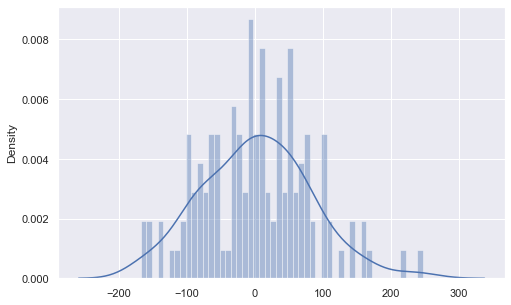

In [49]:
sns.distplot((ytest-ypred),bins=50);

Interpreting the coefficents

In [50]:
x

,Avg Session length,Time on App,Time on Website,Length of MemberShip
0,32.538350,12.028846,35.850540,3.648854
1,34.206718,12.226851,37.246443,1.987536
2,31.535240,11.814341,36.610697,3.351191
3,32.199577,11.295163,37.425695,5.234337
4,33.570137,13.500972,36.856165,3.938603
...,...,...,...,...
618,31.941434,11.158640,36.846959,3.219605
619,33.446133,12.374820,37.592235,4.917733
620,32.967749,11.392061,36.916664,2.955718
621,33.469949,11.930872,37.744155,4.577850


In [51]:
lm.coef_

array([[-6.91767269, -1.60958013,  8.0670534 , -2.31865575]])

In [52]:
type(lm.coef_)

numpy.ndarray

In [53]:
x.columns.shape

(4,)

In [54]:
type(x.columns)

pandas.core.indexes.base.Index

In [55]:
x.columns

Index(['Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip'],
      dtype='object')

In [56]:
coeff = lm.coef_

In [57]:
coeff

array([[-6.91767269, -1.60958013,  8.0670534 , -2.31865575]])

In [58]:
cols = ['Avg Session length', 'Time on App', 'Time on Website',
       'Length of MemberShip'],

In [59]:
cols

(['Avg Session length',
  'Time on App',
  'Time on Website',
  'Length of MemberShip'],)

In [60]:
coeff = {
    'columns':['Avg Session length','Time on App','Time on Website','Length of MemberShip'],
    'lm_coeff' :[-6.91767269, -1.60958013,  8.0670534 , -2.31865575]}
df_coeff = pd.DataFrame(coeff)

In [61]:
df_coeff

,columns,lm_coeff
0,Avg Session length,-6.917673
1,Time on App,-1.609580
2,Time on Website,8.067053
3,Length of MemberShip,-2.318656


In [62]:
lm.intercept_

array([456.0328122])

Interpretation of coeffiecients:

The predicted value of y would be as per the equation y = m1x1 + m2x2 + m3x3 + c

y_predicted = -6.91 x1 + (-1.60)x2 + 8.06 x3 + (-2.31) x4 + 456

We see that except for the "time on website" feature, the other features('Avg Session length','Time on App','Time on Website',  'Length of MemberShip') are negative indicating that the company should concentrate more on this feature

Lets use an other algorithm to test the model performance

# Random forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rfr = RandomForestRegressor(n_estimators=40)
rfr.fit(xtrain,ytrain)



RandomForestRegressor(n_estimators=40)

In [65]:
ypred = rfr.predict(xtest)
ypred

array([468.94220448, 495.8422531 , 490.72596881, 511.94573104,
       513.96993998, 547.60259177, 517.56836711, 481.7334653 ,
       468.02269871, 513.45014252, 456.18962406, 506.7591341 ,
       483.58220487, 535.96629615, 512.70319464, 529.25293188,
       487.73457972, 410.35285564, 550.93505548, 492.73850339,
       503.70450068, 512.5439261 , 525.70984199, 539.24114977,
       501.17627203, 504.35214177, 494.01493911, 488.48837864,
       462.24877166, 518.41198296, 471.24640969, 504.11479917,
       493.50958157, 474.33833184, 519.37057379, 515.49884404,
       512.12568741, 504.04645664, 504.24381753, 520.22483963,
       465.42050785, 497.76996412, 495.12306312, 512.10427273,
       482.78644652, 518.45602123, 476.27239723, 461.12478312,
       491.48851328, 486.85568018, 531.12549272, 481.44131468,
       479.20944008, 473.61623092, 482.95547747, 433.38840609,
       512.556221  , 524.37711246, 541.24810163, 462.5876665 ,
       470.55976797, 468.42250141, 522.57312962, 491.93

# CrossValidation

To increase the overall performance of the model lets do the k-fold cross validation wherein the dataset would be split into k sets

We will create a function "get_score" to optimise the code for different models

In [68]:
get_score(LinearRegression(),xtrain,ytrain,xtest,ytest)

NameError: name 'get_score' is not defined

K-fold cross validation


K-fold Cross-Validation is when the dataset is split into a K number of folds and is used to evaluate the model's ability when given new data.K refers to the number of groups the data sample is split into

In [69]:
from sklearn.model_selection import KFold


In [70]:
kf = KFold(n_splits=5,random_state=1 ,shuffle=True)
kf

KFold(n_splits=5, random_state=1, shuffle=True)

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
#scores = cross_val_score(lm,x,y,cv = kf,scoring='accuracy',n_jobs=-1)
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [73]:
#scores

In [74]:
from sklearn.model_selection import cross_val_score
cvs_linearreg = cross_val_score(LinearRegression(),x,y,cv = kf)
cvs_linearreg

array([-0.02518233,  0.0092219 , -0.00819729,  0.02006776, -0.03824538])

In [76]:
cvs_linearreg.mean()

-0.008467067576430986

CrossValidation for RandomForest regressor

In [77]:
cvs_randomforest = cross_val_score(RandomForestRegressor(n_estimators=40),x,y,cv = kf,n_jobs=-1)
cvs_randomforest

array([-0.11471204, -0.16571225, -0.05369078, -0.14006891, -0.25566825])

In [78]:
cvs_randomforest.mean()

-0.14597044690920366

Comparision of the RandomForest Regressor and  LinearRegresssion  cross validation score

In [79]:
cvs_score_comparision = pd.DataFrame({"CrossValidation_LR":[-0.02518233,  0.0092219 , -0.00819729,  0.02006776, -0.03824538],
                                     "CrossValidation_RF":[-0.10701862, -0.13402766, -0.13020327, -0.12602057, -0.28535466]})

In [80]:
cvs_score_comparision

,CrossValidation_LR,CrossValidation_RF
0,-0.025182,-0.107019
1,0.009222,-0.134028
2,-0.008197,-0.130203
3,0.020068,-0.126021
4,-0.038245,-0.285355


CrossValidation_LR has  two positive values and performed better than CrossValidation_RF

To improve the accracy of the model ,lets do the feature scaling as the dataset features have  different measures.Bringing them on the common scale might improve the accuracy of the data

Since the data is normally distributed ,We will be using the minmaxscaler() to scale the data as it preserves the 
shape of the original distribution and does not reduce the importance of the outliers

Checking the shape of the  train and test data

In [81]:
xtrain

,Avg Session length,Time on App,Time on Website,Length of MemberShip
311,34.474237,11.094889,37.634411,2.205388
3,32.199577,11.295163,37.425695,5.234337
498,32.502368,11.708869,38.268295,3.148290
9,33.696003,12.488779,36.322443,1.965374
452,31.458388,11.467596,35.845812,3.292072
...,...,...,...,...
129,33.298852,10.891190,36.454557,3.960829
144,33.597525,12.600622,38.725477,2.870866
72,32.957002,12.930322,36.280190,1.476733
235,32.838231,11.563166,35.330290,3.140038


# Feature Scaling

We will print the dataset to observe the range of the feature column 

In [82]:
df

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641
...,...,...,...,...,...,...
618,619,31.941434,11.158640,36.846959,3.219605,559.546775
619,620,33.446133,12.374820,37.592235,4.917733,515.186966
620,621,32.967749,11.392061,36.916664,2.955718,601.715746
621,622,33.469949,11.930872,37.744155,4.577850,477.741395


In [83]:
df.head(1) #loading the first row of the dataset

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.53835,12.028846,35.85054,3.648854,576.098273


From the first row it is evident that the each column has a different range and scale.Example Yearly amount spent might be in 
dollars and "length of the membership" might be in years-months and "time on website" might be in hours-seconds etc
Hence to improve the performanve of the model and accuracy we will do the feature scaling 

MinMax scaler

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g., between zero and one. 
This Scaler shrinks the data within the range of -1 to 1 if there are negative values. 
This Scaler responds well if the standard deviation is small and is sensitive to outliers

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

In [86]:
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [87]:
xtrain

array([[0.77994586, 0.32720676, 0.55025734, 0.24013797],
       [0.38586851, 0.36318043, 0.52068284, 0.79369287],
       [0.43832594, 0.43749113, 0.64007674, 0.41245773],
       ...,
       [0.5170899 , 0.65689091, 0.35836837, 0.10697274],
       [0.49651316, 0.41131952, 0.22377047, 0.41094962],
       [0.66159755, 0.74814484, 0.68570968, 0.49570658]])

In [88]:
xtest

array([[5.28905875e-01, 5.33581840e-01, 3.11690397e-01, 2.82472581e-01],
       [3.73661973e-01, 6.05144883e-01, 2.84456513e-01, 4.69756476e-01],
       [1.93118072e-01, 2.91334245e-01, 6.17288903e-01, 4.21935933e-01],
       [4.08280206e-01, 4.43302002e-01, 6.43283142e-01, 1.41869244e-02],
       [3.88958037e-01, 3.25431229e-01, 4.85259370e-01, 3.41852116e-01],
       [7.74492470e-01, 2.78969933e-01, 7.23667108e-01, 3.65191339e-01],
       [3.21957663e-01, 4.95488574e-01, 5.51600589e-01, 1.33249819e-01],
       [7.04864090e-01, 5.55108829e-01, 4.57338419e-01, 4.18347311e-01],
       [1.45478117e-01, 7.90079701e-01, 5.85103647e-01, 3.27141775e-01],
       [3.19778176e-01, 4.21657959e-01, 7.23737602e-01, 6.36541045e-01],
       [5.16027947e-01, 3.03430075e-01, 3.71394904e-01, 3.03456307e-01],
       [1.70770529e-01, 2.43254956e-01, 4.59459894e-01, 3.52229610e-01],
       [3.52898128e-01, 3.20328216e-01, 3.26530606e-01, 4.04343495e-01],
       [3.19678837e-01, 6.64701719e-01, 4.58654756e

In [89]:
ytrain = np.array(ytrain).reshape(-1,1)

In [90]:
ytrain

array([[519.9172503],
       [547.7099206],
       [454.1013747],
       [775.3376264],
       [587.7284004],
       [453.1538155],
       [477.1383803],
       [436.4414613],
       [562.5788846],
       [557.7796207],
       [378.0998039],
       [485.7875287],
       [399.7951066],
       [489.3190778],
       [454.5756406],
       [498.8061365],
       [454.1220746],
       [469.8050485],
       [515.269332 ],
       [385.867739 ],
       [498.7771182],
       [434.1229236],
       [552.1396572],
       [436.946162 ],
       [521.4339094],
       [448.1110244],
       [534.5276137],
       [544.2897308],
       [479.1500562],
       [630.7542373],
       [359.9859116],
       [545.7625589],
       [482.9731948],
       [549.4124213],
       [578.5380168],
       [463.1398415],
       [452.6075126],
       [393.6693844],
       [549.8396353],
       [485.0237966],
       [470.7157422],
       [676.8736181],
       [500.5145954],
       [418.9765161],
       [542.9962973],
       [59

In [91]:
ytrain = scaler.fit_transform(ytrain)
ytrain

array([[0.50754517],
       [0.56112991],
       [0.38065105],
       [1.        ],
       [0.63828622],
       [0.37882414],
       [0.42506678],
       [0.34660243],
       [0.58979753],
       [0.58054447],
       [0.23411873],
       [0.44174249],
       [0.27594764],
       [0.44855138],
       [0.38156544],
       [0.46684259],
       [0.38069096],
       [0.410928  ],
       [0.49858391],
       [0.24909544],
       [0.46678664],
       [0.34213225],
       [0.56967052],
       [0.3475755 ],
       [0.51046932],
       [0.36910155],
       [0.5357142 ],
       [0.55453573],
       [0.42894533],
       [0.72124077],
       [0.19919483],
       [0.55737537],
       [0.43631641],
       [0.56441236],
       [0.62056701],
       [0.39807736],
       [0.37777085],
       [0.26413714],
       [0.56523604],
       [0.44027   ],
       [0.41268383],
       [0.81015972],
       [0.47013652],
       [0.31292972],
       [0.55204197],
       [0.65488378],
       [0.37011689],
       [0.507

In [92]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [93]:
ypred = lm.predict(xtest)

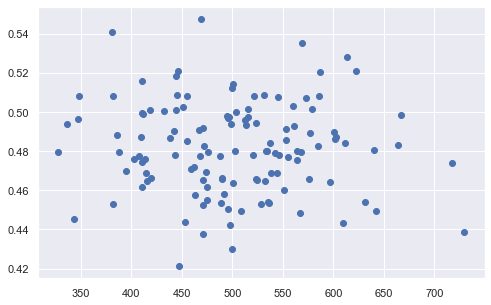

In [94]:
plt.scatter(ytest,ypred)

In [95]:
from sklearn.metrics import mean_squared_error as MSE,mean_absolute_error as MAE,r2_score
mse = MSE(ytest,ypred)
rmse = np.sqrt(mse)

ac = r2_score(ytest,ypred)
print(f"MSE : {mse} \n RMSE : {rmse} \n Accuracy : {ac}")

MSE : 256371.1953150883 
 RMSE : 506.3311123317313 
 Accuracy : -40.491875986161354


We see no improvement in the accuracy of the model on using minmax scaler.We will try using standard scalet to check the accuracy

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
ss = StandardScaler()

In [98]:
xtrain = ss.fit_transform(xtrain)
xtest = ss.fit_transform(xtest)

In [99]:
lm.fit(xtrain,ytrain)

LinearRegression()

In [100]:
ypred = lm.predict(xtest)

In [101]:
mse = MSE(ytest,ypred)
rmse = np.sqrt(mse)

ac = r2_score(ytest,ypred)
print(f"MSE : {mse} \n RMSE : {rmse} \n Accuracy : {ac}")

MSE : 256385.03890971807 
 RMSE : 506.34478264293205 
 Accuracy : -40.494116474648656


# Xg-Boost algorthm

In [102]:
import sys
!{sys.executable} -m pip install xgboost

In [103]:
from xgboost import XGBRegressor


In [104]:
model_xg=XGBRegressor()
model_xg.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [105]:
ypred = model_xg.predict(xtest)

xgb=r2_score(ytest, ypred)
xgb

-40.49085086323112

In [106]:
from sklearn.linear_model import Ridge ,Lasso


In [107]:
l2 = Ridge(alpha=10)
l2.fit(xtrain,ytrain)
ypred = l2.predict(xtest)
from sklearn.metrics import r2_score
print(f"Accuracy : {r2_score(ytest,ypred)}")

Accuracy : -40.494115990465055


Interpretation:


On building Linear Regression models using Random forest and XG-Boost algorithms ,we see that the accuracy is negative.

This indicated that the features need to be tweaked and seen to get a good accuracy.

We might have to get an indepth view of the dataset and tweak the independent features  .

Lets try and see the performance and accyracy after tewaking the independent columns

The model building will be continued in the next file "Ecommerce-feature_tweak" 